<div style="display: flex; align-items: flex-start;">
    <a href='https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction' target='_blank'>
        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSLM2y1Co0vDGfqILhwESRISu4iZuHkogeBZw&s" alt="NYC Taxi" style="border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);" width="600" height="500">
    </a>
    <div style="margin-left: 20px;">
        <p style="color: #B22222; font-size: 16px;"><strong>Project Objective:</strong> The objective of this project is to develop a machine learning model that can predict taxi fare amounts for rides in New York City. The goal is to utilize features such as pickup and dropoff locations, time of day, and passenger count to accurately estimate the fare.</p>

Exploratory Data Analysis (EDA): Examined missing values, distributions, and correlations within the dataset.

Data Cleaning: Addressed missing values by imputing or removing them as appropriate, particularly focusing on critical data such as latitude and longitude values.

Feature Engineering: Transformed existing variables and created new features (e.g., distance traveled, time of day) to enhance model performance.

Feature Selection: Identified the most influential features to improve model accuracy.

Modeling: Developed models using various regression algorithms including linear regression, decision trees, random forests, and gradient boosting machines.

Model Evaluation: Evaluated models using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared to select the best-performing model.

Hyperparameter Optimization: Improved model performance through techniques like Grid Search and Random Search to optimize hyperparameters.

<p style="color: green; text-align: center; margin-top: 20px;">
    Click on the image to access the data files and the project's Kaggle page.
</p>


# EDA - Data Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
import numpy as np
from scipy import stats

In [2]:
df2=pd.read_csv("train.csv")
df3=pd.read_csv("test.csv")

In [3]:
numeric_cols = df2.select_dtypes(include=[np.number]).columns

z_scores = np.abs(stats.zscore(df2[numeric_cols]))

outliers = (z_scores > 3).any(axis=1)

# Outlier'ları filtrele ve yeni DataFrame oluştur
df2= df2[~outliers].reset_index(drop=True)

In [4]:
df2 = df2.sample(frac=0.01, random_state=42)

In [5]:
df3['fare_amount'] = None

In [6]:
df3.isnull().sum()

key                     0
pickup_datetime         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
fare_amount          9914
dtype: int64

In [7]:
df2= df2.dropna()

In [8]:
df1 = pd.concat([df3, df2])

/var/folders/54/3ndbm4sx1r91pc_9n7tk08d40000gn/T/ipykernel_9195/1686589636.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df1 = pd.concat([df3, df2])


In [9]:
df1.shape,df2.shape,df3.shape

((540961, 8), (531047, 8), (9914, 8))

In [10]:
df1.isnull().sum()

key                     0
pickup_datetime         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
fare_amount          9914
dtype: int64

In [11]:
df1.sample(5)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
492039,2010-05-13 14:21:00.000000194,2010-05-13 14:21:00 UTC,-73.958722,40.763862,-73.967635,40.766003,2,8.5
30344876,2015-01-31 01:08:26.0000001,2015-01-31 01:08:26 UTC,-73.993355,40.727261,-73.983994,40.743889,1,7.0
38164231,2014-10-18 01:25:00.00000066,2014-10-18 01:25:00 UTC,-74.005175,40.739997,-74.010310,40.723370,1,7.5
44902533,2013-07-28 19:00:19.0000004,2013-07-28 19:00:19 UTC,-73.870987,40.773808,-73.972351,40.690563,1,31.5
2701617,2013-11-10 19:01:56.0000002,2013-11-10 19:01:56 UTC,-73.963100,40.775186,-73.954456,40.779059,1,4.5


In [12]:
df1.corr(numeric_only=True)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
pickup_longitude,1.000000,0.072696,0.017532,-0.007932,-0.001734,0.264742
pickup_latitude,0.072696,1.000000,-0.000218,0.028785,-0.003368,-0.086680
dropoff_longitude,0.017532,-0.000218,1.000000,-0.630495,-0.002820,0.017825
dropoff_latitude,-0.007932,0.028785,-0.630495,1.000000,0.000980,-0.017028
passenger_count,-0.001734,-0.003368,-0.002820,0.000980,1.000000,0.008810
fare_amount,0.264742,-0.086680,0.017825,-0.017028,0.008810,1.000000


In [13]:
abs(df1.corr(numeric_only=True)['fare_amount']).sort_values(ascending=False)

fare_amount          1.000000
pickup_longitude     0.264742
pickup_latitude      0.086680
dropoff_longitude    0.017825
dropoff_latitude     0.017028
passenger_count      0.008810
Name: fare_amount, dtype: float64

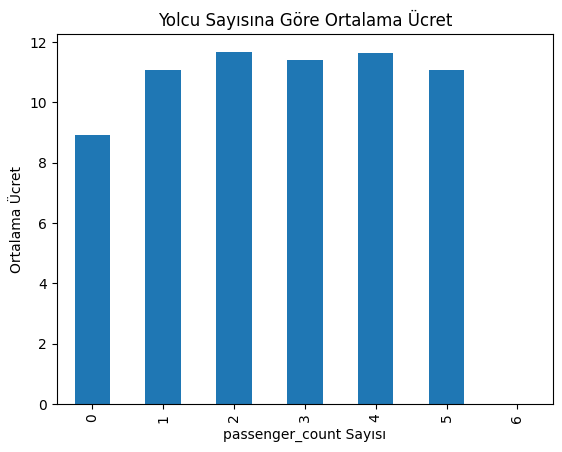

<Figure size 1000x600 with 0 Axes>

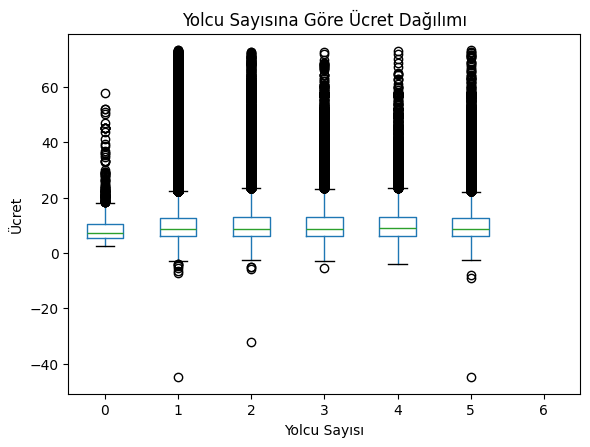

In [14]:
average_fare_by_passenger_count = df1.groupby('passenger_count')['fare_amount'].mean()
average_fare_by_passenger_count.plot(kind='bar')
plt.xlabel('passenger_count Sayısı')
plt.ylabel('Ortalama Ücret')
plt.title('Yolcu Sayısına Göre Ortalama Ücret')
plt.show()

plt.figure(figsize=(10, 6))
df1.boxplot(column='fare_amount', by='passenger_count', grid=False)
plt.xlabel('Yolcu Sayısı')
plt.ylabel('Ücret')
plt.title('Yolcu Sayısına Göre Ücret Dağılımı')
plt.suptitle('')
plt.show()

In [15]:
# Bağımsız ve bağımlı değişkenleri belirleme
X = df1[['passenger_count']]
y = df1['fare_amount']

# Bağımsız değişkenlere sabit ekleme
X = sm.add_constant(X)

# Modeli oluşturma ve eğitme
model = sm.OLS(y, X).fit()

# Sonuçları özetleme
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 24 Aug 2024   Prob (F-statistic):                nan
Time:                        18:50:00   Log-Likelihood:                    nan
No. Observations:              540961   AIC:                               nan
Df Residuals:                  540959   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const                  nan        nan     

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540961 entries, 0 to 2147539
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                540961 non-null  object 
 1   pickup_datetime    540961 non-null  object 
 2   pickup_longitude   540961 non-null  float64
 3   pickup_latitude    540961 non-null  float64
 4   dropoff_longitude  540961 non-null  float64
 5   dropoff_latitude   540961 non-null  float64
 6   passenger_count    540961 non-null  int64  
 7   fare_amount        531047 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 37.1+ MB


In [17]:
df1 = df1[(df1['fare_amount'] > 0) | (df1['fare_amount'].isna())]

In [18]:
# pickup_datetime sütunundan ek özellikler çıkarma
df1['pickup_datetime'] = pd.to_datetime(df1['pickup_datetime'])
df1['hour'] = df1['pickup_datetime'].dt.hour
df1['day'] = df1['pickup_datetime'].dt.day
df1['month'] = df1['pickup_datetime'].dt.month
df1['year'] = df1['pickup_datetime'].dt.year
df1['day_of_week'] = df1['pickup_datetime'].dt.dayofweek

In [19]:
df1.shape

(540925, 13)

In [20]:
df1['is_night'] = ((df1['hour'] >= 21) | (df1['hour'] < 6)).astype(int)

In [21]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Sezon sütunu ekleme
df1['season'] = df1['month'].apply(get_season)

In [22]:
df1=df1.drop(["pickup_datetime"],axis=1)

In [23]:
df1=df1.drop(["hour","month","day"],axis=1)

In [24]:
df1['year'] = df1['year'].astype('category')
df1['day_of_week'] = df1['day_of_week'].astype('category')
df1['is_night'] = df1['is_night'].astype('category')

In [25]:
key_column = df1['key']

# 'key' sütunu hariç diğer sütunlar için dummy değişkenleri oluşturma
df1 = pd.get_dummies(df1.drop(columns=['key']))

In [26]:
df1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,year_2009,year_2010,year_2011,year_2012,...,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,is_night_0,is_night_1,season_Fall,season_Spring,season_Summer,season_Winter
0,-73.973320,40.763805,-73.981430,40.743835,1,NaN,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,-73.986862,40.719383,-73.998886,40.739201,1,NaN,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,-73.982524,40.751260,-73.979654,40.746139,1,NaN,False,False,True,False,...,False,False,True,False,True,False,True,False,False,False
3,-73.981160,40.767807,-73.990448,40.751635,1,NaN,False,False,False,True,...,False,False,True,False,False,True,False,False,False,True
4,-73.966046,40.789775,-73.988565,40.744427,1,NaN,False,False,False,True,...,False,False,True,False,False,True,False,False,False,True


In [27]:
train = df1[df1['fare_amount'].notna()]
test = df1[df1['fare_amount'].isna()]

In [28]:
x=train.drop("fare_amount",axis=1)
y=train["fare_amount"]

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [30]:
print("Best Model:", algo_test(x, y))

Best Model:                         R_Squared      RMSE       MAE
XGBRegressor         8.507533e-01  3.518205  1.832617
Gradient Boosting    7.715093e-01  4.353143  2.842887
Decision Tree        7.038689e-01  4.955765  2.535227
KNeighborsRegressor  6.717156e-01  5.217877  2.744713
Extra Tree           6.060597e-01  5.715891  3.116060
Ridge                1.139667e-01  8.572228  5.510655
Linear               1.139419e-01  8.572349  5.511044
Lasso               -7.692873e-08  9.106862  5.841631
ElasticNet          -7.692873e-08  9.106862  5.841631


In [31]:
x.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'year_2009', 'year_2010',
       'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'is_night_0',
       'is_night_1', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')

In [32]:
# 'key' sütununu geri ekleme
df1['key'] = key_column

In [33]:
df1=df1.drop("key",axis=1)

In [34]:
train = df1[df1['fare_amount'].notna()]
test = df1[df1['fare_amount'].isna()]

In [35]:
x=train.drop("fare_amount",axis=1)
y=train["fare_amount"]

In [36]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,is_night_0,is_night_1,season_Fall,season_Spring,season_Summer,season_Winter
0,-73.973320,40.763805,-73.981430,40.743835,1,NaN,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True
1,-73.986862,40.719383,-73.998886,40.739201,1,NaN,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True
2,-73.982524,40.751260,-73.979654,40.746139,1,NaN,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False
3,-73.981160,40.767807,-73.990448,40.751635,1,NaN,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True
4,-73.966046,40.789775,-73.988565,40.744427,1,NaN,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True


In [37]:
GBR=XGBRegressor()

In [38]:
model=GBR.fit(x,y)

In [39]:
x_test = test.drop("fare_amount", axis=1)

In [40]:
tahmin=model.predict(x_test)

In [41]:
# Eksik verileri doldurma
df1.loc[df1['fare_amount'].isna(), 'fare_amount'] = tahmin

In [42]:
df1.isnull().sum()

pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
fare_amount          0
year_2009            0
year_2010            0
year_2011            0
year_2012            0
year_2013            0
year_2014            0
year_2015            0
day_of_week_0        0
day_of_week_1        0
day_of_week_2        0
day_of_week_3        0
day_of_week_4        0
day_of_week_5        0
day_of_week_6        0
is_night_0           0
is_night_1           0
season_Fall          0
season_Spring        0
season_Summer        0
season_Winter        0
dtype: int64

In [43]:
test.loc[test['fare_amount'].isna(), 'fare_amount'] = tahmin

In [44]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,is_night_0,is_night_1,season_Fall,season_Spring,season_Summer,season_Winter
0,-73.973320,40.763805,-73.981430,40.743835,1,9.116914,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True
1,-73.986862,40.719383,-73.998886,40.739201,1,10.234802,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True
2,-73.982524,40.751260,-73.979654,40.746139,1,5.313328,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False
3,-73.981160,40.767807,-73.990448,40.751635,1,6.571102,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True
4,-73.966046,40.789775,-73.988565,40.744427,1,16.052261,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True


In [45]:
df3.shape

(9914, 8)

In [46]:
df_new = pd.DataFrame({
    'key': df3['key'],
    'fare_amount': test['fare_amount']
})

# Yeni DataFrame'i CSV olarak kaydetme
df_new.to_csv('submission.csv', index=False)

In [47]:
df_new.shape

(9914, 2)

In [48]:
df_new.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.116914
1,2015-01-27 13:08:24.0000003,10.234802
2,2011-10-08 11:53:44.0000002,5.313328
3,2012-12-01 21:12:12.0000002,6.571102
4,2012-12-01 21:12:12.0000003,16.052261


In [49]:
mae = mean_absolute_error(y, model.predict(x))
mse = mean_squared_error(y, model.predict(x))
r2 = r2_score(y, model.predict(x))

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1.7825995752349235
Mean Squared Error (MSE): 11.111964570628908
R-squared (R2): 0.8653713518375601
